In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans 

# Data Understanding 

When looking over the TUDA dictionary I identified alcohol as an area of intrest. 
Orignally the dat had 104 attributes, By familiarising myself with the data I decided that only 31 attributes were actaully directly relevant to the topic. 

# Data Preparation and Cleaning

Reading the TUDA  database into my notebook

In [4]:
data = pd.read_csv('TUDA-Reduced.csv')
data

,ProjectIDnumber,Cohort,Daterecordcreated,Gender,Deciage,Waistmeasurementincm,Hipmeasurementincm,WaistHip,Timedupngo,Bornwherecat,...,Vitamin_D,tHcyumolL,HoloTCpmolL,TotalserumB12pmolL,MMAumolL,FolatenmolL,RCFnmolL,VitaminB6markerPLPnmolL,RiboflavinmarkerEGRac,TotalRBANSscale
0,1,Cognitive,17/12/2008,Male,80.726027,91.0,103.0,0.883495,24.5,Island of Ireland,...,52.2,25.40,44.20,191.9,0.391,8.29,573.70,8.80,1.66,65.0
1,2,Cognitive,17/12/2008,Male,74.547945,106.0,110.0,0.963636,19.5,Island of Ireland,...,58.3,20.10,49.29,366.6,0.350,13.43,664.46,42.69,1.51,79.0
2,3,Cognitive,19/12/2008,Female,70.457534,109.0,153.0,0.712418,21.5,Island of Ireland,...,14.9,14.21,65.53,361.1,0.151,13.43,798.52,36.33,1.44,105.0
3,4,Cognitive,19/12/2008,Male,72.553425,95.0,109.0,0.871560,22.0,Island of Ireland,...,23.6,15.20,37.50,352.1,0.417,13.68,487.29,19.06,1.26,69.0
4,5,Cognitive,22/12/2008,Female,84.038356,82.0,104.0,0.788462,28.0,Island of Ireland,...,81.2,17.41,140.60,679.0,0.319,91.99,3429.92,34.03,1.13,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,5996,Hypertensive,15/11/2010,Female,64.616438,95.0,103.0,0.922330,8.0,Island of Ireland,...,26.6,8.58,102.61,336.9,NaN,27.60,1224.00,258.48,1.28,92.0
5182,5997,Hypertensive,16/11/2010,Male,74.810959,125.0,129.0,0.968992,9.0,Island of Ireland,...,20.8,12.29,72.14,289.4,NaN,23.49,995.00,36.61,1.26,82.0
5183,5998,Hypertensive,18/11/2010,Female,73.846575,92.0,99.0,0.929293,9.1,Island of Ireland,...,48.3,10.19,58.03,234.7,NaN,10.82,436.00,34.04,1.31,101.0
5184,5999,Hypertensive,16/11/2010,Female,77.882192,101.0,99.0,1.020202,15.1,Island of Ireland,...,14.5,12.21,215.35,771.1,NaN,12.83,1368.00,24.92,1.37,NaN


In [5]:
data.shape

(5186, 104)

In [6]:
#rounding the data to two deciaml places for easier reading
data =data.round(decimals =2 ) 

###### DROPPING IRRLEVANT COLUMNS WITHIN DATAFRAME
https://blog.hubspot.com/website/drop-multiple-columns-pandas

In [7]:
df= pd.DataFrame(data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186 entries, 0 to 5185
Columns: 104 entries, ProjectIDnumber to TotalRBANSscale
dtypes: float64(74), int64(1), object(29)
memory usage: 4.1+ MB


From the dataframe information above we can understand which data types have been used within the database.
We can also see that the atributes have non-null constraint meaning that the attributes must have a value, meaning i will have no null values in my data to fill or remove.

In [9]:
df.drop(['ProjectIDnumber','Timedupngo','Bornwherecat','AverageSystolic', 'AverageDiastolic','Living_with','Marital_status','Agefinishededucation','AngioplastyCABG','ABICarotidarterydopplers','Carotidendarterectomy','Bypassoperations','Familyhistoryofcancer','Familyhistoryofstroke','Familyhistoryofheartdisease','Falleninlastyear','Limithouseholdactivities','Limitoutsideactivities','Supplementnameverification','Smokingstatus','Agestartedsmoking','Smokedcigarettesregularly','Stillasmoker','Numberofcigarettesperday','Howmanydaysforrolloftobacco','Whatagestoppedsmoking','Averageperdaysmoked','Eating','Dressingundressing','Getaroundhousewithouthelp','Takingcareofappearance','Getinnoutbed','Abletobathe','Troublegettingtobathroomontime','Howoftenwettingrsoiling','TotalPSMS','Usethetelephone','Gettoplacesoutofwalkingdistance','Goshoppingforgroceries','Prepareownmeals','Doownhousework','Doownhandymanwork','Doownlaundry','Usinganymedications','Takingownmedicine','Manageownmoney','TotalIADL','TotalFAB','MMSETotal','WCC','MCV','PLTS','HCT','Creatinine','Albumin','Na','Ca','Po3','AlkPhos','Cholesterol','LDL','HDL','Triglycerides','HbA1C','PTHpgml','GFRmlmin','tHcyumolL','TotalserumB12pmolL','MMAumolL','FolatenmolL','RCFnmolL','VitaminB6markerPLPnmolL','RiboflavinmarkerEGRac'], axis=1, inplace=True)

In [10]:
df

,Cohort,Daterecordcreated,Gender,Deciage,Waistmeasurementincm,Hipmeasurementincm,WaistHip,Weightinkg,Heightincm,Bodymassindex,...,HADStotal,Hb,Urea,GammaGT,K,CRP,Glucose,Vitamin_D,HoloTCpmolL,TotalRBANSscale
0,Cognitive,17/12/2008,Male,80.73,91.0,103.0,0.88,72.0,168.0,25.51,...,0.0,12.9,11.4,29.0,3.6,3.19,6.6,52.2,44.20,65.0
1,Cognitive,17/12/2008,Male,74.55,106.0,110.0,0.96,98.0,175.5,31.82,...,4.0,17.0,9.0,57.0,4.3,10.9,5.4,58.3,49.29,79.0
2,Cognitive,19/12/2008,Female,70.46,109.0,153.0,0.71,123.0,173.0,41.10,...,1.0,14.6,6.1,22.0,4.1,7.54,4.4,14.9,65.53,105.0
3,Cognitive,19/12/2008,Male,72.55,95.0,109.0,0.87,75.0,188.0,21.22,...,15.0,14.3,9.7,83.0,3.8,3.19,5.3,23.6,37.50,69.0
4,Cognitive,22/12/2008,Female,84.04,82.0,104.0,0.79,57.0,153.0,24.35,...,0.0,11.0,11.0,51.0,4.4,3.43,4.6,81.2,140.60,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,Hypertensive,15/11/2010,Female,64.62,95.0,103.0,0.92,78.0,162.5,29.54,...,1.0,14.6,6.3,47.0,4.8,11,7.4,26.6,102.61,92.0
5182,Hypertensive,16/11/2010,Male,74.81,125.0,129.0,0.97,124.0,179.4,38.53,...,0.0,13.0,4.5,179.0,4.7,crp <5,8.4,20.8,72.14,82.0
5183,Hypertensive,18/11/2010,Female,73.85,92.0,99.0,0.93,62.0,150.0,27.56,...,7.0,13.3,5.7,16.0,4.4,crp <5,4.6,48.3,58.03,101.0
5184,Hypertensive,16/11/2010,Female,77.88,101.0,99.0,1.02,69.0,163.0,25.97,...,0.0,12.0,5.7,29.0,3.7,6,6.4,14.5,215.35,NaN


In [ ]:
df=df.dropna(how='any', axis=0)
df

###### Correlations and comparisions

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

A correlation matrix:

In [11]:
df.corr()

,Deciage,Waistmeasurementincm,Hipmeasurementincm,WaistHip,Weightinkg,Heightincm,Bodymassindex,Dayspermonthdrinkingalcohol,Totalunitsperweek,Depressionscaletotal,HADStotal,Hb,Urea,GammaGT,K,Glucose,Vitamin_D,HoloTCpmolL,TotalRBANSscale
Deciage,1.000000,-0.113480,-0.125455,-0.031623,-0.279803,-0.226337,-0.196644,-0.099322,-0.170484,0.017999,-0.131219,-0.323092,0.300597,-0.022356,-0.058369,-0.037793,0.008362,-0.038527,-0.310280
Waistmeasurementincm,-0.113480,1.000000,0.781690,0.711325,0.844665,0.357953,0.791165,0.027723,0.107263,0.082869,-0.036616,0.167684,0.081014,0.135696,0.154047,0.223713,-0.253269,-0.085002,-0.043379
Hipmeasurementincm,-0.125455,0.781690,1.000000,0.124990,0.765378,0.184915,0.819998,-0.040095,-0.003316,0.093807,-0.019370,0.069636,0.037165,0.066833,0.091385,0.137655,-0.191280,-0.062585,0.033826
WaistHip,-0.031623,0.711325,0.124990,1.000000,0.486584,0.356469,0.347294,0.088813,0.174534,0.023995,-0.043081,0.185747,0.087447,0.141378,0.139253,0.199577,-0.191116,-0.067431,-0.108339
Weightinkg,-0.279803,0.844665,0.765378,0.486584,1.000000,0.567109,0.843245,0.052132,0.138965,-0.002227,-0.030721,0.263343,0.029044,0.105084,0.176927,0.219148,-0.238882,-0.077324,0.091501
Heightincm,-0.226337,0.357953,0.184915,0.356469,0.567109,1.000000,0.046950,0.169055,0.227511,-0.094657,-0.062355,0.340547,-0.009037,0.056150,0.192077,0.124907,-0.118102,-0.049986,0.135510
Bodymassindex,-0.196644,0.791165,0.819998,0.347294,0.843245,0.046950,1.000000,-0.042995,0.020746,0.060470,0.004755,0.094860,0.039895,0.089140,0.089638,0.181501,-0.213835,-0.059791,0.028074
Dayspermonthdrinkingalcohol,-0.099322,0.027723,-0.040095,0.088813,0.052132,0.169055,-0.042995,1.000000,0.678775,-0.042562,-0.018745,0.154962,-0.091866,0.106577,0.020741,-0.047717,0.030744,-0.038410,0.153681
Totalunitsperweek,-0.170484,0.107263,-0.003316,0.174534,0.138965,0.227511,0.020746,0.678775,1.000000,-0.024757,0.003638,0.186376,-0.108470,0.168857,0.053237,0.001636,-0.019285,-0.056801,0.100534
Depressionscaletotal,0.017999,0.082869,0.093807,0.023995,-0.002227,-0.094657,0.060470,-0.042562,-0.024757,1.000000,0.454045,-0.066262,0.019003,0.055197,-0.005586,0.073395,-0.098381,-0.025533,-0.213808


In [12]:
correlations = df.corr()
print (correlations)

                              Deciage  Waistmeasurementincm  \
Deciage                      1.000000             -0.113480   
Waistmeasurementincm        -0.113480              1.000000   
Hipmeasurementincm          -0.125455              0.781690   
WaistHip                    -0.031623              0.711325   
Weightinkg                  -0.279803              0.844665   
Heightincm                  -0.226337              0.357953   
Bodymassindex               -0.196644              0.791165   
Dayspermonthdrinkingalcohol -0.099322              0.027723   
Totalunitsperweek           -0.170484              0.107263   
Depressionscaletotal         0.017999              0.082869   
HADStotal                   -0.131219             -0.036616   
Hb                          -0.323092              0.167684   
Urea                         0.300597              0.081014   
GammaGT                     -0.022356              0.135696   
K                           -0.058369              0.15

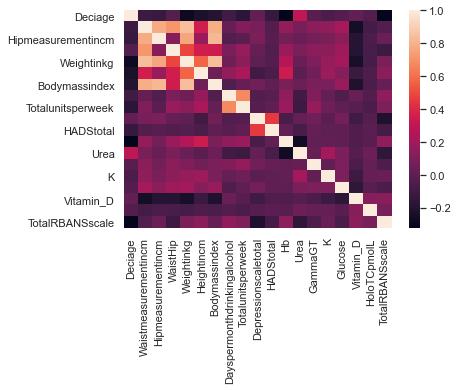

In [13]:
%matplotlib inline
sns.heatmap(correlations)
plt.show()

The above heatmap is clearly over crowded and shows that i have to mnay attributes within my data and therfore will need to reduce it further more. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186 entries, 0 to 5185
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cohort                            5186 non-null   object 
 1   Daterecordcreated                 5186 non-null   object 
 2   Gender                            5186 non-null   object 
 3   Deciage                           5186 non-null   float64
 4   Waistmeasurementincm              5111 non-null   float64
 5   Hipmeasurementincm                5108 non-null   float64
 6   WaistHip                          5108 non-null   float64
 7   Weightinkg                        5165 non-null   float64
 8   Heightincm                        5159 non-null   float64
 9   Bodymassindex                     5158 non-null   float64
 10  Driving_status                    5182 non-null   object 
 11  GI_disease                        5186 non-null   object 
 12  Family

Reducing the size of the data furthermore

In [15]:
df.drop(['Cohort','Waistmeasurementincm','Hipmeasurementincm','WaistHip','Bodymassindex','Familyhistoryofpreseniledementia','Driving_status','Familyhistoryofseniledementia','Fortifiedfoods','Vitaminsupplements','Depressionscaletotal','Vitamin_D','HoloTCpmolL'], axis=1, inplace=True )

In [16]:
df.drop(['Exerciseinpasttwoweeks'], axis = 1, inplace=True)

In [17]:
df.drop(['Daterecordcreated'], axis = 1, inplace=True)

In [18]:
df.drop(['Heightincm'], axis = 1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186 entries, 0 to 5185
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       5186 non-null   object 
 1   Deciage                      5186 non-null   float64
 2   Weightinkg                   5165 non-null   float64
 3   GI_disease                   5186 non-null   object 
 4   Drinkingstatus               5184 non-null   object 
 5   Dayspermonthdrinkingalcohol  5166 non-null   float64
 6   Totalunitsperweek            5184 non-null   float64
 7   HADStotal                    5178 non-null   float64
 8   Hb                           5137 non-null   float64
 9   Urea                         5136 non-null   float64
 10  GammaGT                      5131 non-null   float64
 11  K                            5130 non-null   float64
 12  CRP                          5046 non-null   object 
 13  Glucose           

I reduced my data by around 54% and then repeated the heatmap code but on a more defines scale.

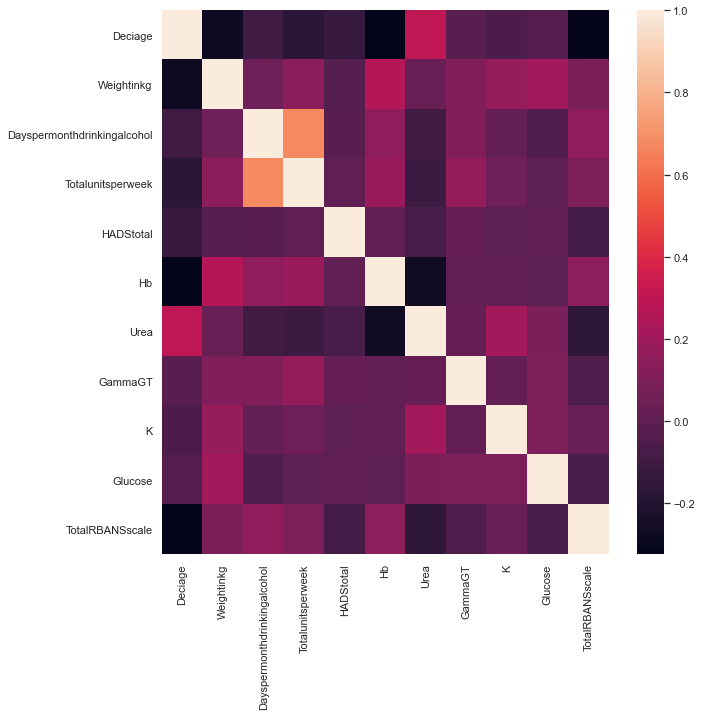

In [20]:
correlation=df.corr()
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(correlation)
plt.show()

The heat map shows obvious correlation between attributes such as 'total units per week' and 'days per month drinking alcohol' however there are some less predicted correlations such as the relation between 'Total units per week' and 'GammaGT' levels. 

In [21]:
df.describe()

,Deciage,Weightinkg,Dayspermonthdrinkingalcohol,Totalunitsperweek,HADStotal,Hb,Urea,GammaGT,K,Glucose,TotalRBANSscale
count,5186.000000,5165.00000,5166.000000,5184.000000,5178.000000,5137.000000,5136.000000,5131.000000,5130.000000,5108.000000,4961.000000
mean,74.026138,72.97394,5.382985,4.541908,3.179220,13.245503,6.961686,37.144829,4.166725,6.059276,85.445475
std,8.270178,16.86144,8.825769,10.280538,3.670979,1.523949,2.756964,42.819212,0.457883,2.296265,16.971712
min,59.720000,31.00000,0.000000,0.000000,0.000000,0.430000,0.420000,2.390000,2.600000,2.400000,11.000000
25%,67.152500,61.00000,0.000000,0.000000,0.000000,12.300000,5.300000,17.000000,3.900000,4.800000,74.000000
50%,73.415000,71.00000,1.000000,0.000000,2.000000,13.300000,6.400000,25.000000,4.100000,5.400000,85.000000
75%,80.210000,83.00000,8.000000,5.000000,5.000000,14.200000,7.925000,40.000000,4.400000,6.400000,97.000000
max,101.990000,154.60000,30.000000,170.000000,21.000000,18.300000,39.300000,702.000000,8.700000,32.300000,145.000000


https://www.python-graph-gallery.com/bubble-plot/

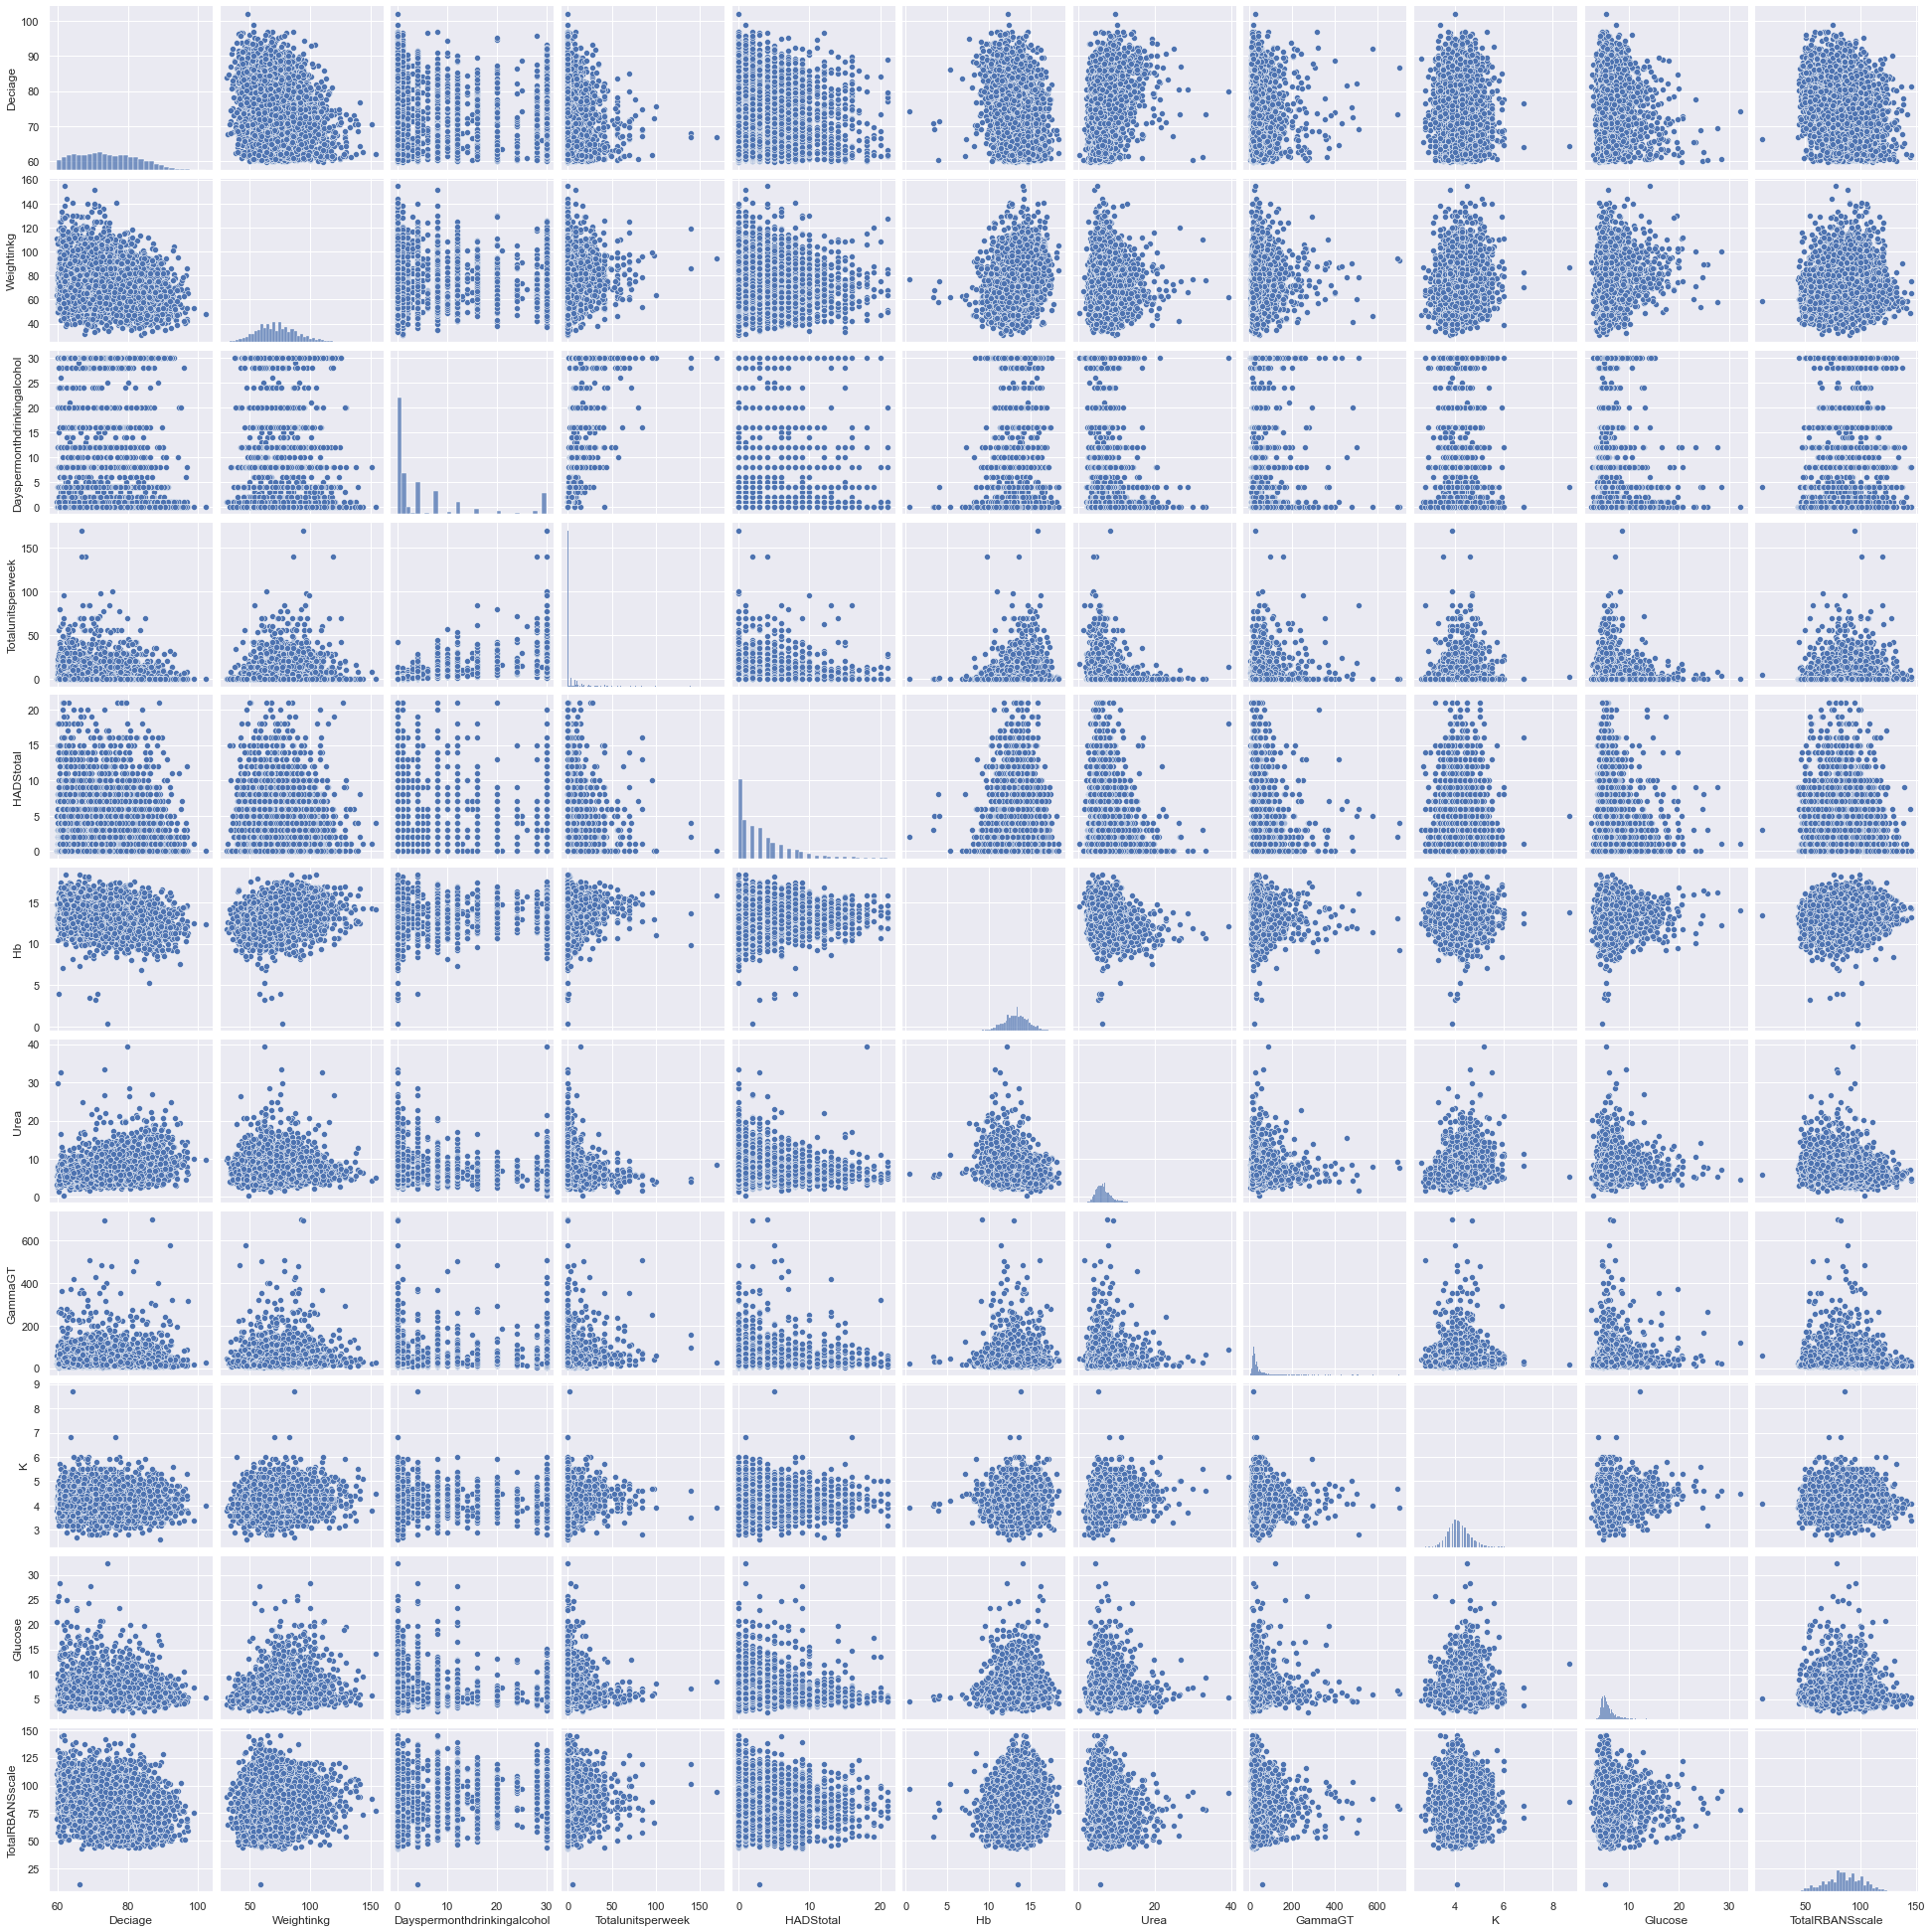

In [22]:
# Basic correlogram
sns.pairplot(df)
plt.show()

Although the above pairplot is overwhelming, it is incredibly useful for identifing correlations between atributes for example the decreasing link between GammaGT levels and HADStotal or the increasing relation between total alcohol units drunk per week and Hb levels.

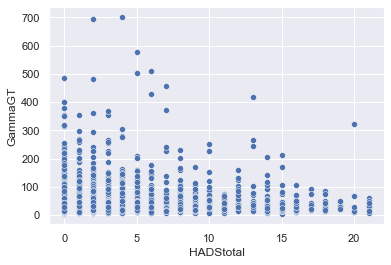

In [23]:
sns.scatterplot(data=df, x='HADStotal', y='GammaGT', legend=False, sizes=(20,20))
plt.show()

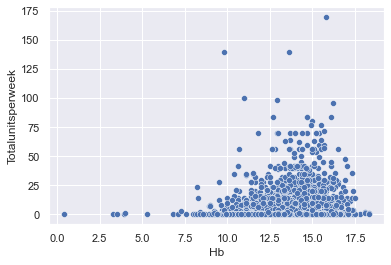

In [24]:
sns.scatterplot(data=df, x='Hb', y='Totalunitsperweek', legend=False, sizes=(20,200))
plt.show()

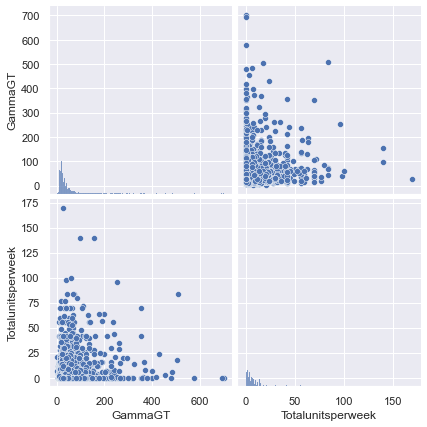

In [25]:
sns.pairplot(df, vars=['GammaGT', 'Totalunitsperweek'],palette=sns.color_palette(['#FF1493', '#FF69B4']), height=3)

Scores were classified based on the following criteria for RBANS Total Score: Average/Mild Impairment (standard scores of 70 or above), Moderate Impairment (standard scores from 55 to 69), and Severe Impairment (standard scores <54 )WWW.NIG.GOV

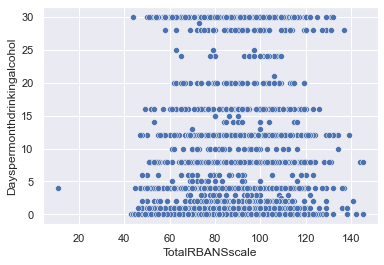

In [26]:
sns.scatterplot(data=df, x='TotalRBANSscale',y='Dayspermonthdrinkingalcohol', legend=False, sizes=(20,200))
plt.show()

# Modelling and Evaluation

 https://medium.com/thrive-in-ai/classification-algorithms-in-python-5f58a7a27b88

https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3


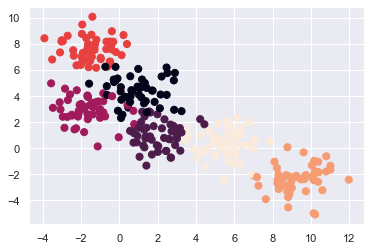

In [27]:
from sklearn.datasets import make_blobs 
X, y_true = make_blobs(n_samples = 300, centers=6, cluster_std=1.0, random_state=0)
plt.scatter(X[:,0],X[:,1],c=y_true, s=50);

###### Seperating the data into train-split using sklearn

In [28]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=0)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 2) (60, 2) (240,) (60,)


###### 1. Nearest Neighbours Classification

In [30]:
from sklearn import neighbors

In [31]:
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.95

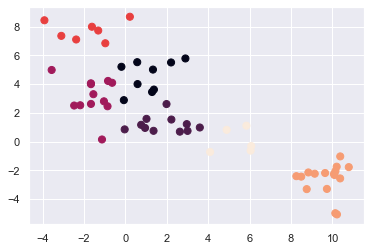

In [32]:
plt.scatter(X_test[:,0], X_test[:,1], c=knn.predict(X_test), s=50);

##### 2. Gaussian Naive Bayes Classifier 

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9333333333333333

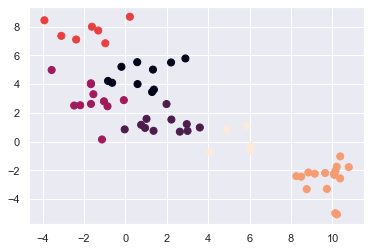

In [35]:
plt.scatter(X_test[:,0],X_test[:,1], c=gnb.predict(X_test), s=50);

#### Evaluation Techniques

https://datatron.com/how-to-evaluate-your-machine-learning-models-with-python-code/

https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3

###### AUC-ROC Curve

In [36]:
import numpy as np 
from sklearn.metrics import roc_auc_score
y_true = np.array([0,0,1,1])
y_scores = np.array([0.1,0.4,0.35,0.8])
roc_auc_score(y_true, y_scores)


0.75

An AUC of 0.75 means that if we take two data points from two different classes, there is a 75% chance that the model will correctly segregate or rank order them, 
www.analyticssteps.com

###### Confusion Matrix

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

In [37]:
import numpy
actual = numpy.random.binomial(1, 0.9, size=1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000)

In [38]:
from sklearn import metrics

In [39]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [40]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

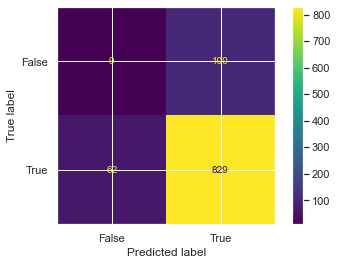

In [41]:
cm_display.plot()
plt.show()

###### Accuracy:
How often is the model accurate 

In [44]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.838


###### Precision:
Of the predicted positives, what percentage where actually positive?

In [45]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.8923573735199138


###### Sensitivity Recall 
How good is the model at predicting positives 

In [46]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)

0.9304152637485971


###### Specificity
How good is the model of predicting negatives 

In [47]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.08256880733944955


###### F-Score
Considers both false negatives and positives 

In [48]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score )

0.910989010989011
